In [6]:
import pandas as pd

df = pd.read_csv('data/partidos_cebollitas.csv')

# Features previously created
df['diferencia_goles'] = df['goles_local'] - df['goles_visitante']
df['ratio_tiros_posesion_local'] = df['tiros_arco_local'] / (df['posesion_local (%)'])
df['ratio_tiros_posesion_visitante'] = df['tiros_arco_visitante'] / (df['posesion_visitante (%)'])

df.head()

,fecha_partido,equipo_local,equipo_visitante,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante,estadio,diferencia_goles,ratio_tiros_posesion_local,ratio_tiros_posesion_visitante
0,2023-01-01,Atlético Python,Cebollitas FC,2,0,54,46,12,6,Python Arena,2,0.222222,0.130435
1,2023-01-08,NumPy City,Atlético Python,1,5,60,40,12,3,Estadio ML,-4,0.200000,0.075000
2,2023-01-15,Cebollitas FC,Data United,1,0,55,45,10,7,Python Arena,1,0.181818,0.155556
3,2023-01-22,Atlético Python,Data United,2,3,57,43,3,3,Campo Pandas,-1,0.052632,0.069767
4,2023-01-29,Data United,Cebollitas FC,5,3,52,48,7,12,Estadio ML,2,0.134615,0.250000


In [7]:
df_cebollitas = df[(df['equipo_local'] == 'Cebollitas FC') | (df['equipo_visitante'] == 'Cebollitas FC')]

In [8]:
from sklearn.feature_selection import SelectKBest, f_regression

# Selecting features to predict 'goles_local'
x = df_cebollitas[['posesion_local (%)', 'tiros_arco_local', 'ratio_tiros_posesion_local']]
y = df_cebollitas['goles_local']

# Apply SelectKBest
selector = SelectKBest(score_func=f_regression, k=2)
selector.fit(x, y)

# Get scores and selected features
scores = selector.scores_
selected_features = x.columns

results = pd.DataFrame({'Feature': selected_features, 'Score': scores}).sort_values(by='Score', ascending=False)
results

,Feature,Score
2,ratio_tiros_posesion_local,0.328026
1,tiros_arco_local,0.302698
0,posesion_local (%),0.277927


In [9]:
from sklearn.tree import DecisionTreeRegressor

# Train a simple Decision Tree model
model = DecisionTreeRegressor(random_state=42)
model.fit(x, y)

# Feature importance
importances = model.feature_importances_
importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': importances}).sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
2,ratio_tiros_posesion_local,0.814168
0,posesion_local (%),0.156108
1,tiros_arco_local,0.029724


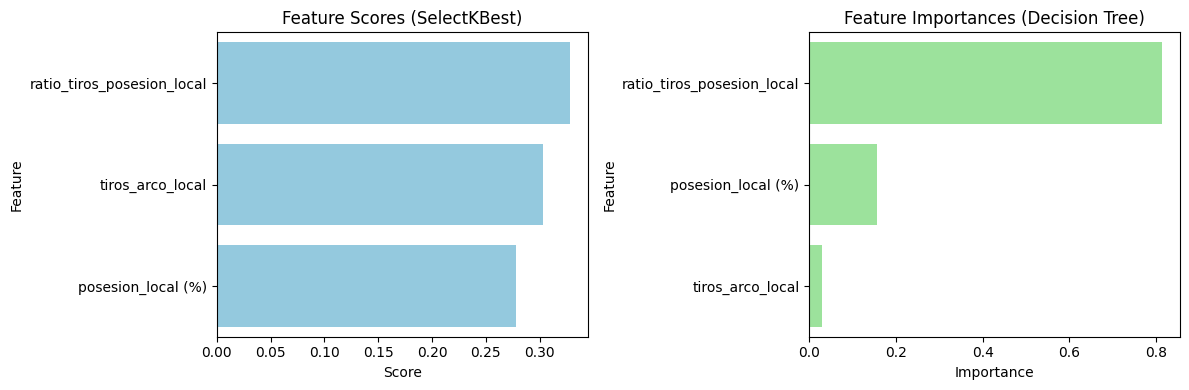

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.barplot(x='Score', y='Feature', data=results, ax=ax[0], color='skyblue')
ax[0].set_title('Feature Scores (SelectKBest)')
sns.barplot(x='Importance', y='Feature', data=importance_df, ax=ax[1], color='lightgreen')
ax[1].set_title('Feature Importances (Decision Tree)')
plt.tight_layout()
plt.show()